<a href="https://colab.research.google.com/github/FinLZ/NEUR265_Zakas/blob/main/coding_homework_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Coding Homework #8

**Instructions**

1. Make a *Markdown Cell* that contains the following information:
- Your name (small header)
- The name of this class (italicized)
- The date (bolded)

2. Create a *Code Cell* that imports relevant modules - specifically, <code>numpy as np</code>, <code>matplotlib.pyplot as plt</code>, and <code>from scipy.stats import pearsonr</code>.

3. For this assignment, you will be working with the <code>fear_conditioning_traces_hw8.csv</code>, and <code>extinction_predictors_hw8.csv</code> files that I uploaded to our shared Google Drive folder. You will also be using the <code>shock_index.csv</code> and <code>tone_index.csv</code> files on our shared GitHub repo (we used these files to complete our in-class coding notebook on 4/12/23). Upload all of these files to your GitHub repo, and import them as <code>numpy</code> arrays named <code>fear_traces</code>, <code>extinction_predictors</code>, <code>shock_index</code>, and <code>tone_index</code>, respectively, in a *Code Cell*. **Important**: Make sure you that import <code>tone_index.csv</code> and <code>shock_index.csv</code> using the **exact** syntax that we used in our 4/12/23 in-class notebook - e.g., <code>np.loadtxt('', delimiter = ',').astype(int)</code>.

4. The <code>fear_conditioning_traces</code> array contains scaled (between 0 and 1) fluorescent traces from ROIs (individual cells) in the anterior cingulate cortex (ACC) of one mouse during **fear conditioning** and **fear extinction**. We went over fear conditioning in class - the mouse is presented with an auditory tone that coincides with a mild foot-shock. The mouse learns to associate the tone with the foot-shock, thereby forming a fear memory. This mouse underwent fear conditioning, and 48 hours later, was placed back into the conditioning chamber and presented with the auditory tone to assess how well it remembered the tone/foot-shock combination. The tone was presented a total of 22 times - eventually, as the tone is continuously presented without the foot-shock, the mouse begins to disassociate the tone and the foot-shock, and form a neutral extinction memory. The cells in your <code>fear_conditioning_traces</code> array were able to be stably imaged across both sessions, allowing us to compare how they react across fear memory formation and extinction.

5. In a new *Code Cell*, make two new variables - <code>conditioning_traces</code>, and <code>extinction_traces</code>. Your <code>fear_conditioning_traces</code> array contains ROIs (cells) in columns, and samples in rows. The first 10458 samples correspond to the conditioning session, and the remaining samples correspond to the extinction session. Your <code>conditioning_traces</code> array should contain the first 10458 samples (as rows), with ROIs (cells) as columns. Your <code>extinction_traces</code> array should contain the remaining (10459 through the final sample) samples (as rows), with ROIs (cells) as columns. 

6. In a new *Code Cell*, print the size of your <code>conditioning_traces</code> and <code>extinction_traces</code> arrays. 

7. In a new *Code Cell*, make <code>time_conditioning</code> and <code>time_extinction</code> variables, corresponding to time during the conditioning session, and time during the extinction session, respectively. The sampling rate for the miniscope used to capture these data was 15 fps. Use this information to make your variables, which should both start at "0", end at the total length of the recording session (in seconds), and have a length equal to the number of samples for each session.

8. In a new *Markdown Cell*, state the number of ROIs (cells) that were imaged during these sessions, and the total length of time, both in seconds, and in minutes, of the conditioning and extinction sessions.

9. In a new *Code Cell*, plot the first and second ROIs from your <code>conditioning_traces</code> variable in one subplot. Plot the first and second ROIs from your <code>extinction_traces</code> variable in a second subplot. Make the first ROI <font color = 'blue'>blue</font>, and the second ROI <font color = 'red'>red</font> in each subplot. Put time on the x-axis of both subplots. Make vertical black lines at shock onset (3 total), and vertical green lines at tone onset (3 total) in your first subplot. Label your axes.

10. In a new *Markdown Cell*, describe the relationship between the conditioning/extinction traces for your first ROI, and the conditioning/extinction traces for your second ROI. Does there seem to be a relationship between how a cell responds during conditioning, and how it responds during extinction?

11. To evaluate how each cell might respond during conditioning and extinction more formally, we're going to use generalized linear modeling (GLM). To do this, we're going to use shock onset and tone onset as predictors in our model for the conditioning session, and tone onset as predictors for another model for the extinction session. We'll correlate the actual traces and the predicted traces from these models, and compare correlation coefficients between the two sessions to see if there's a relationship. This will answer the question: If a cell responds more strongly to shocks/tones during conditioning, does it also respond more strongly to tones during extinction? In other words - are the cells that encode the tone/shock memory the same cells that form the extinction memory?

12. In a new *Code Cell*, make a <code>predictors_conditioning</code> variable that contains shock onset and tone onset. Reference our in-class notebook from 4/12/23 to do this - specifically, the *Code Cell* underneath the section that says **Modeling our Fear Data**. These are the same data that we used for this notebook, so you can use this exact code to re-create your <code>shock_array</code> and <code>tone_array</code> variables. Reference how we made the <code>predictors</code> variable for <code>model1</code> and <code>model3</code> in that notebook - you should have the same <code>predictors</code> variable as <code>model3</code> for your <code>predictors_conditioning</code> variable here (i.e., the two variables should be identical). 

13. We want to now run our model for each ROI in our <code>conditioning_traces</code> array, correlate the predicted trace vs. the actual trace, and store the correlation coefficient in a new variable called <code>r_model_conditioning</code>. To do this, reference the last *Code Cell* in our notebook from 4/12/23 - specifically, the subsection that says <code># For model 3</code>. You will need to first create your <code>r_model_conditioning</code> variable using <code>np.zeros</code> - remember that this time, we have more than 10 ROIs, so you will need to change the number inside of the parentheses. You will also need to change the number of times your loop runs from <code>for i in range(10)</code> to loop through all of the ROIs in your <code>conditioning_traces</code> array. In a new *Code Cell*, create your <code>r_model_conditioning</code> variable, and run your <code>for</code> loop. Each loop should extract an ROI from <code>conditioning_traces</code>, run <code>sm.GLM</code> between the trace and the <code>predictors</code> variable you created, fit the model, create a predicted trace, get a correlation coefficient using <code>pearsonr</code>, and store the correlation coefficient in a new column of <code>r_index_conditioning</code>.

14. In a new *Code Cell*, run another loop that does the same thing for your <code>extinction_traces</code> array. This time, you should make a variable called <code>r_index_extinction</code> to store your correlation coefficients. You should use your <code>extinction_predictors</code> variable as the predictor for your model (this contains values for tone onset during the extinction session). 

15. In a new *Code Cell*, use the <code>pearsonr</code> function to correlate your <code>r_index_conditioning</code> and <code>r_index_extinction</code> variables.

16. In a new *Code Cell*, make a <code>scatter</code> plot with <code>r_index_conditioning</code> on the x-axis, and <code>r_index_extinction</code> on the y-axis. Label your axes.

17. In a new *Markdown Cell*, interpret your results. Based on your correlation coefficient and scatter plot, does it seem like a cell that responds strongly to shock and tone onset during the conditioning session is more likely to respond strongly to tone onset during the extinction session?

18. Make sure to put a <code>#</code> in each *Code Cell* to describe what it does.

19. Save a copy of this notebook to your GitHub repo with the title <code>coding_homework_8.ipynb</code>.

### Fin Zakas
*NEUR 265: Intro to Neural Data Analysis*

__4/19/2023__

In [42]:
#import relevant modules
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [43]:
#Import fear conditioning, extinction predictors, shock index, and tone index files as numpy arrays
fear_traces = np.loadtxt('https://raw.githubusercontent.com/FinLZ/NEUR265_Zakas/main/fear_conditioning_traces_hw8.csv', delimiter = ',')
extinction_predictors = np.loadtxt('https://raw.githubusercontent.com/FinLZ/NEUR265_Zakas/main/extinction_predictors_hw8.csv', delimiter = ',')
shock_index = np.loadtxt('https://raw.githubusercontent.com/hallockh/neur_265/main/shock_index.csv', delimiter = ',').astype(int)
tone_index = np.loadtxt('https://raw.githubusercontent.com/hallockh/neur_265/main/tone_index.csv', delimiter = ',').astype(int)

In [44]:
#Make conditioning_traces and extinction_traces arrays with samples as rows and cells as columns
#Including the first 10458 samples makes extinction traces too short (14210 rows) to compare with extinction predictors (14211 rows) in later analysis 
conditioning_traces = fear_traces[:10457]
extinction_traces = fear_traces[10457:]

In [45]:
#Print size of conditioning_traces and extinction_traces
print(conditioning_traces.size)
print(extinction_traces.size)

658791
895293


In [51]:
#Make time_conditioning and time_extinction variables corresponding to time during the conditioning and extinction sessions
time_conditioning = np.linspace(0,(len(conditioning_traces)/15), len(conditioning_traces))
time_extinction = np.linspace(0,(len(extinction_traces)/15), len(extinction_traces))

11.618888888888888

Number of cells: 63

Conditioning time: 697 seconds OR 11.6 minutes

Extinction time: 947 seconds OR 15.8 minutes

[Text(0.5, 0, 'Time [s]'), Text(0, 0.5, 'Fluorescent Trace')]

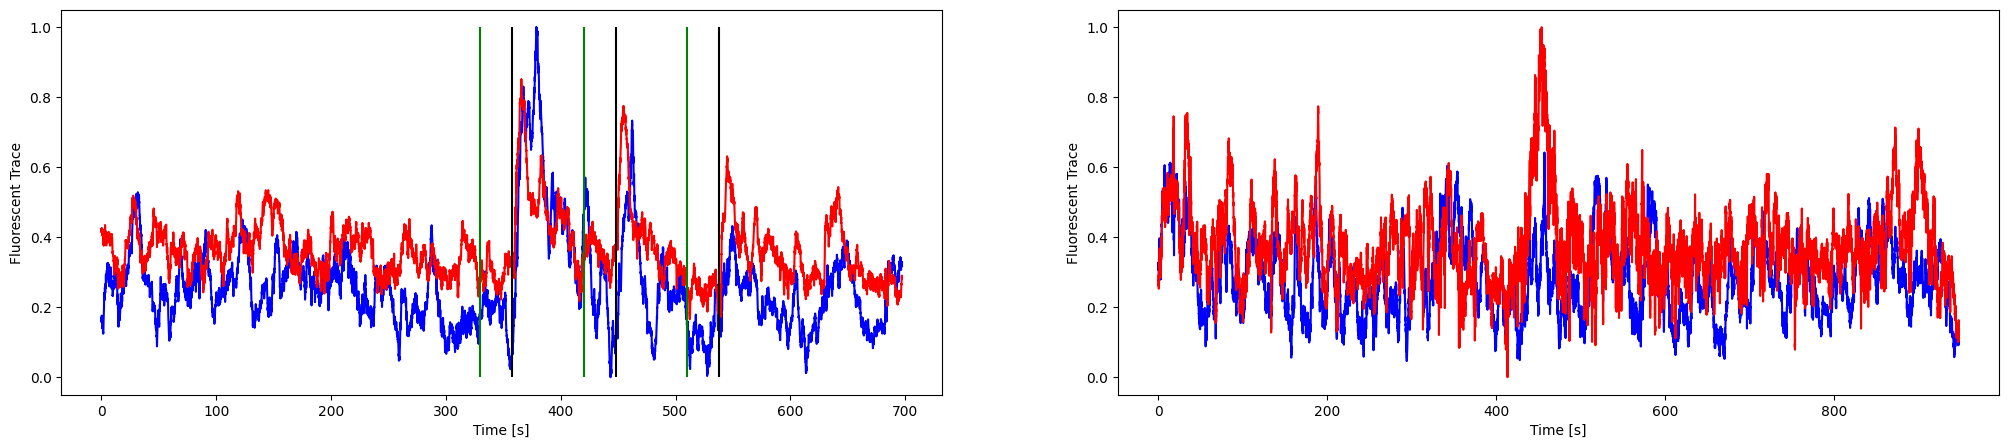

In [52]:
#Plot first and second ROIs from conditioning_traces in one subplot and extinction_traces in another
fig, ax = plt.subplots(1,2, figsize = (25,5))
ax[0].plot(time_conditioning, conditioning_traces[:,0], color = 'blue')
ax[0].plot(time_conditioning, conditioning_traces[:,1], color = 'red')
ax[0].vlines(shock_index,0,1,color = 'black')
ax[0].vlines(tone_index,0,1,color = 'green')
ax[0].set(xlabel = 'Time [s]', ylabel = 'Fluorescent Trace')
ax[1].plot(time_extinction, extinction_traces[:,0], color = 'blue')
ax[1].plot(time_extinction, extinction_traces[:,1], color = 'red')
ax[1].set(xlabel = 'Time [s]', ylabel = 'Fluorescent Trace')

In the conditioning traces for both ROIs, they spike with each delivered shock in decreasing strength (highest fluroescence at shock 1, lowest after shock 3). Further, with each shock, the second ROI becomes more dominant than the first (higher trace in second and third shock but not the first). In the extinction trace we see a continuation from the trends of conditioning. The second ROI is slightly more active throughout. Additionally, in extinction trace we see at roughly ~350 and ~430 seconds a spike in fluorescent trace (which aligns with the shocks of the conditioning trial). Interestingly, there is a much greater spike in extinction at the timing of the second shock from conditioning than at the first. However, there is seemingly no (or a much reduced) spike at ~530 seconds which corresponds with the third shock. This demonstrates changing cell response during extinction (realizing the shock isn't going to come). 

In [54]:
#Make a predictors_conditioning variable that contains shock and tone onset
shock_array = np.zeros(10457)
for i in range(10457):
  if i >= (shock_index[0]-15)*15 and i <= (shock_index[0]+30)*15:
    shock_array[i] = 1
  elif i>= (shock_index[1]-15)*15 and i <= (shock_index[1]+30)*15:
    shock_array[i] = 1
  elif i>= (shock_index[2]-15)*15 and i <= (shock_index[2]+30)*15:
    shock_array[i] = 1
  else:
    shock_array[i] = 0

tone_array = np.zeros(10457)
for i in range(10457):
  if i >= (tone_index[0]-15)*15 and i <= (tone_index[0]+30)*15:
    tone_array[i] = 1
  elif i>= (tone_index[1]-15)*15 and i <= (tone_index[1]+30)*15:
    tone_array[i] = 1
  elif i>= (tone_index[2]-15)*15 and i <= (tone_index[2]+30)*15:
    tone_array[i] = 1
  else:
    tone_array[i] = 0

from pandas import DataFrame as df
import statsmodels.api as sm
from statsmodels.genmod.families import Poisson
from statsmodels.genmod.families.links import identity, log
from scipy.stats import chi2
from statsmodels.distributions.empirical_distribution import ECDF

first_trace = conditioning_traces[:,0]

predictors_conditioning = df(data={'Intercept': np.ones_like(tone_array), 'tone onset': tone_array})
predictors_conditioning['shock onset'] = shock_array
model3 = sm.GLM(first_trace, predictors_conditioning, family=Poisson())
model3_results = model3.fit()
b1 = model3_results.params
print('b1:')
print(b1)

b1:
Intercept     -1.346362
tone onset    -0.431748
shock onset    0.411903
dtype: float64


In [55]:
#Run prediction model for each ROI of conditioning_traces and store in r_index_conditioning
r_index_conditioning = np.zeros(63)

for i in range(63):
  trace_temp = conditioning_traces[:,i]
  model_cond = sm.GLM(trace_temp, predictors_conditioning, family=Poisson())
  model_cond_results = model3.fit()
  predicted_trace = model_cond_results.predict()
  rc = pearsonr(trace_temp, predicted_trace)
  r_index_conditioning[i] = rc.statistic

In [56]:
#Run prediction model for each ROI of extinction_traces and store in new r_index_extinction
r_index_extinction = np.zeros(63)

for i in range(63):
  trace_temp = extinction_traces[:,i]
  model_ext = sm.GLM(trace_temp, extinction_predictors, family=Poisson())
  model_ext_results = model_ext.fit()
  predicted_trace = model_ext_results.predict()
  re = pearsonr(trace_temp, predicted_trace)
  r_index_extinction[i] = re.statistic

In [57]:
#Use pearsonr to correlate r_index_conditioning and r_index_extinction
cor = pearsonr(r_index_conditioning, r_index_extinction)
cor

PearsonRResult(statistic=0.0476299564971852, pvalue=0.7108676124839763)

Text(0, 0.5, 'Extinction')

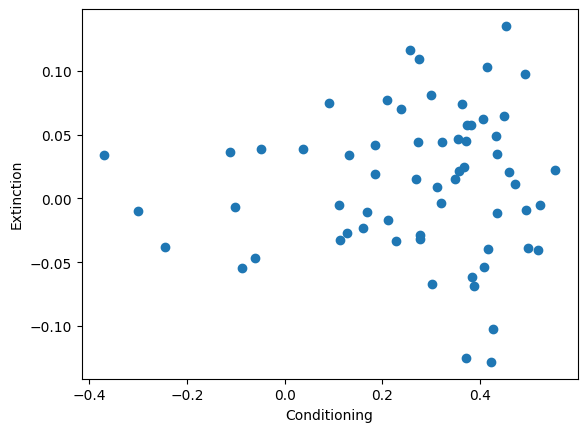

In [58]:
#Scatter conditioning on x axis and extinction on y axis
plt.scatter(r_index_conditioning, r_index_extinction)
plt.xlabel('Conditioning')
plt.ylabel('Extinction')

Based on the correlation coefficient and scatterplot, a cell that responds strongly to tone and shock during conditioning is NOT more likely to respond strongly to tone onset during extinction